Standard imports

In [1]:
import os.path
import matplotlib.pyplot as plt
import numpy as np

Local imports



In [2]:
from initial_params import initial_params
from model_params import load_models

from classes import Embryo
from functions import define_initial_protein_concentrations, setup_embryos, run_model, check_embryos_success, define_experiment_groups
from plot_functions import create_presentation_fig_arrays, set_up_protein_fig, set_up_fig_trio

Define save directory for output


In [3]:
save_directory = 'output/jupyter/'
if not os.path.isdir('output/'):
    os.mkdir('output/')
if not os.path.isdir(save_directory):
    os.mkdir(save_directory)

Choose experiment and select relevant embryos

In [4]:
# choose experiment
experiment_options = ['testing', 'all_exps', 'cell_pellet', 'activin_ant', 'bmp4_ant', 'threshold']
select_exp = 'activin_ant'

if select_exp is 'testing':
    select_embryos = [0]
elif select_exp is 'all_exps':
    select_embryos = list(range(1,15))
elif select_exp is 'cell_pellet':
    select_embryos = [1,2,3,4]
elif select_exp is 'activin_ant':
    select_embryos = [5,6,7,8,9]
elif select_exp is 'bmp4_ant':
    select_embryos = [10,11]
elif select_exp is 'threshold':
    select_embryos = [12,13,14]
else:
    print("Invalid selection for 'select_exp'. Choose option from 'experiment_options'.")

Initialize embryos and models with appropriate parameter values

In [5]:
# initialize embryos
embryoN = 15
embryos = [Embryo('title', initial_params['number_of_cells']) for i in range(embryoN)]
                
# initialize models
models = load_models(select_exp)
modelN = len(models)

# set-up initial protein concentrations in embryos, and add beads
for model_idx, model in enumerate(models):
    
    initial_concentrations = define_initial_protein_concentrations(initial_params)
    embryos = setup_embryos(embryos, model, initial_concentrations)

Print protein concentration diagrams for chosen experiment

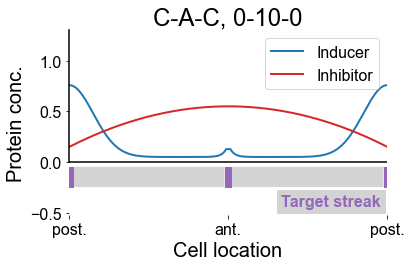

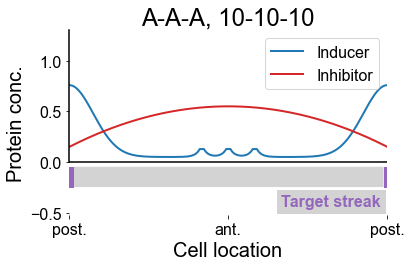

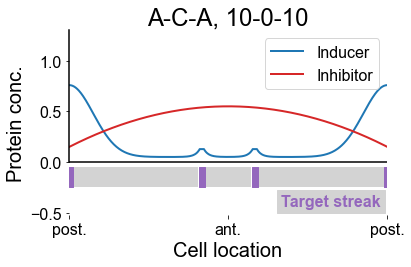

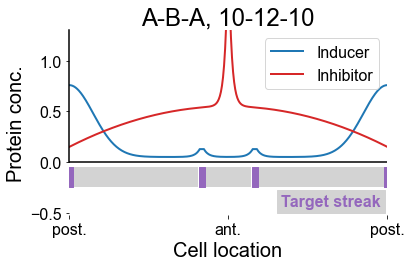

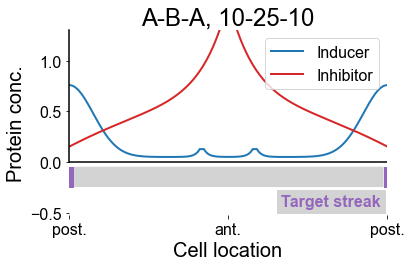

In [6]:
# print protein diagrams
for embryo_idx in select_embryos:
    embryo = embryos[embryo_idx]
    fig = set_up_protein_fig(embryo)
    plt.show()

Run models

In [7]:
model_values = np.ndarray((modelN, embryoN, initial_params['number_of_cells']), dtype=float)
model_ylim = np.ndarray((modelN, embryoN, 2), dtype=float)

for model_idx, model in enumerate(models):
    
    for embryo in embryos:
        run_model(embryo, model)
        embryo.find_streaks()
    
    successN, failureN = check_embryos_success(embryos)
    experiments = define_experiment_groups(embryos)
    for exp in experiments:
        exp.find_plot_model_ylim()
    
    # save model values ready for plotting 
    model_values[model_idx,:,:], model_ylim[model_idx,:,:] = create_presentation_fig_arrays(embryos)
        

Plot output

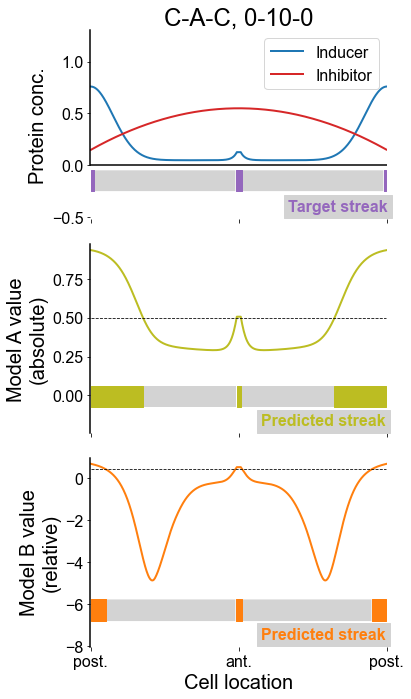

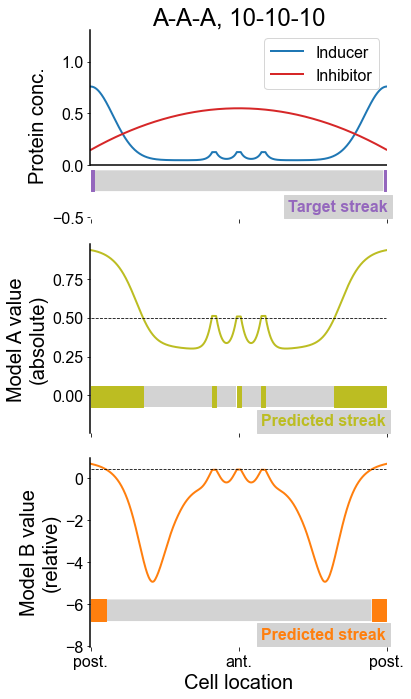

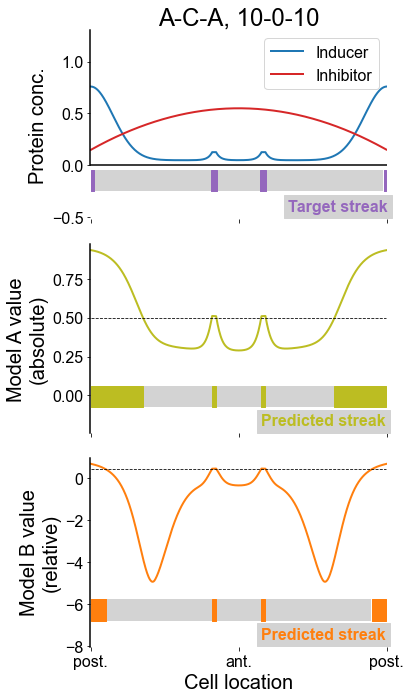

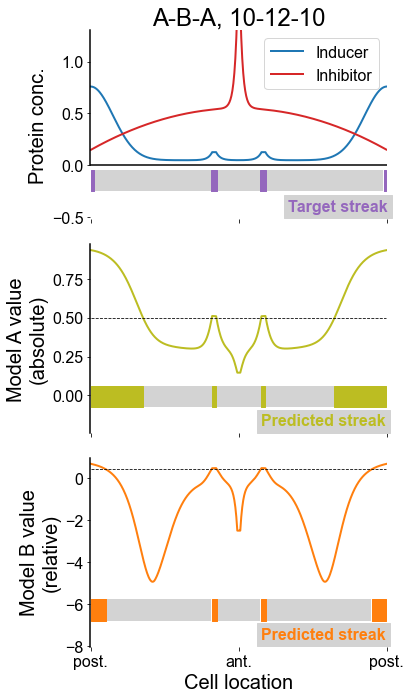

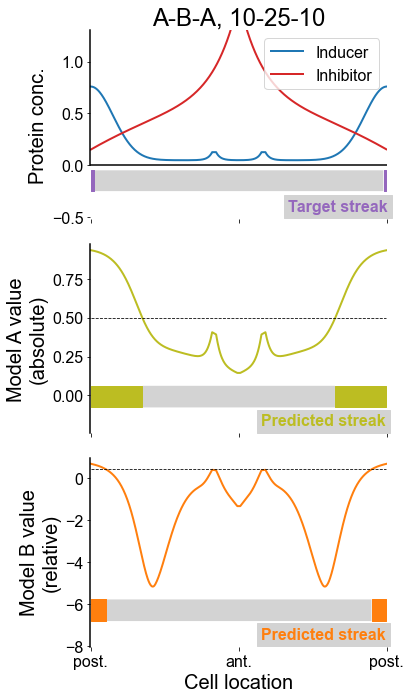

In [8]:
for embryo_idx in select_embryos:
    embryo = embryos[embryo_idx]
    fig_trio = set_up_fig_trio(embryo, models, model_values[:,embryo_idx,:], model_ylim[:,embryo_idx,:])
    plt.show()
    